In [283]:
import pandas as panda
import numpy as nump
import datetime as date
#import tools as tools
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools
#import plotly.figure_factory as ff
#import plotly.graph_objects as go
from wordcloud import WordCloud 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix 
#import sys
#conda install --yes --prefix {sys.prefix} plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import csv 
df1 = panda.read_csv("C:/Users/anuja/Downloads/Womens Clothing E-Commerce Reviews.csv (1)/Womens Clothing E-Commerce Reviews.csv")
df = df1[["Review Text","Rating","Department Name","Age"]]

df1.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,Simply love it,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,Fave one,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,2,3,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,10,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [284]:
df['Review Text'] = df['Review Text'].fillna('')
vectorizer = CountVectorizer()

analyzer = vectorizer.build_analyzer()

def wordcounts(s):
    c = {}
      
    if analyzer(s):
        d = {}
        w = vectorizer.fit_transform([s]).toarray()
        vc = vectorizer.vocabulary_
        for k,v in vc.items():
            d[v]=k 
        for index,i in enumerate(w[0]):
            c[d[index]] = i
    return  c

df["Word Counts"] = df["Review Text"].apply(wordcounts)
df.head()

,Review Text,Rating,Department Name,Age,Word Counts
0,Absolutely wonderful - silky and sexy and comf...,4,Intimate,33,"{'absolutely': 1, 'and': 2, 'comfortable': 1, ..."
1,Love this dress! it's sooo pretty. i happene...,5,Dresses,34,"{'am': 1, 'and': 2, 'bc': 2, 'be': 1, 'below':..."
2,I had such high hopes for this dress and reall...,3,Dresses,60,"{'and': 3, 'be': 1, 'bottom': 1, 'but': 2, 'ch..."
3,"I love, love, love this jumpsuit. it's fun, fl...",5,Bottoms,50,"{'and': 1, 'but': 1, 'compliments': 1, 'every'..."
4,This shirt is very flattering to all due to th...,5,Tops,47,"{'adjustable': 1, 'all': 1, 'and': 1, 'any': 1..."


In [285]:
selectedwords = ['awesome','great','fantastic','extraordinary','amazing','super',
                 'magnificent','stunning','impressive','wonderful','breathtaking',
                 'love','content','pleased','happy','glad','satisfied','lucky',
                 'shocking','cheerful','wow','sad','unhappy','horrible','regret',
                 'bad','terrible','annoyed','disappointed','upset','awful','hate']

def selectedcount(dic,word):
    if word in dic:
        return dic[word]
    else:
        return 0
    
dfwc = df.copy()  
for word in selectedwords:
    dfwc[word] = dfwc['Word Counts'].apply(selectedcount,args=(word,))
    
word_sum = dfwc[selectedwords].sum()
print('Selected Words')
print(word_sum.sort_values(ascending=False).iloc[:5])

print('\nDepartment Names')
print(df['Department Name'].fillna("Empty").value_counts().iloc[:5])

Selected Words
love     8951
great    6117
super    1726
happy     705
glad      614
dtype: int64

Department Names
Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Name: Department Name, dtype: int64


(-0.5, 349.5, 299.5, -0.5)

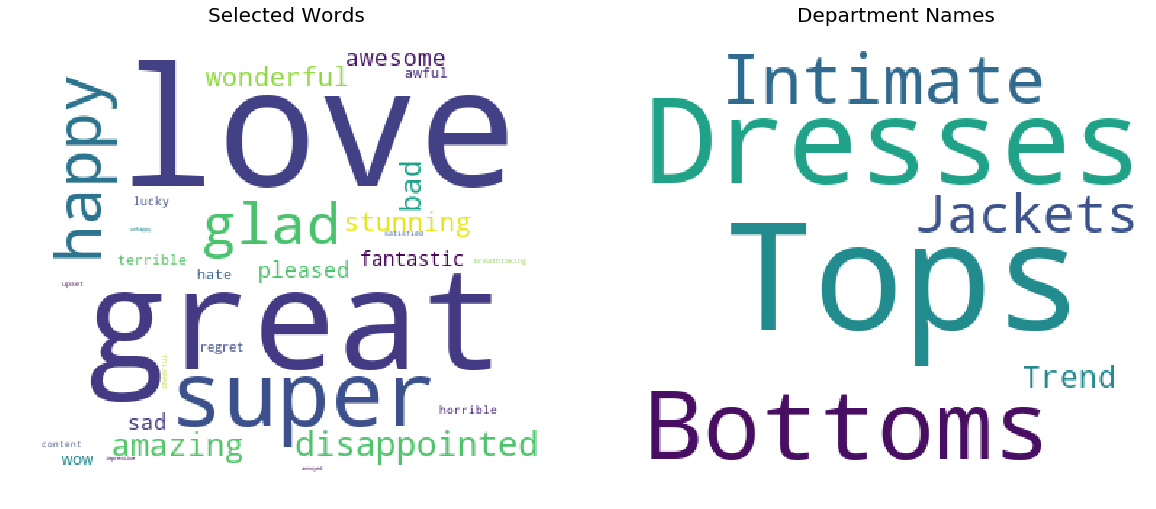

In [271]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
wordcloud = WordCloud(background_color='White',
                      width=350,
                      height=300 ).generate_from_frequencies(word_sum)
cn = df['Department Name'].value_counts()
wordcloud1 = WordCloud(background_color='white',
                      width=350,
                      height=300 ).generate_from_frequencies(cn)

ax[0].imshow(wordcloud)
ax[0].set_title('Selected Words\n',size=20)
ax[0].axis('off')

ax[1].imshow(wordcloud1)
ax[1].set_title('Department Names\n',size=20)
ax[1].axis('off')


In [260]:
#import plotly.plotly as py
#import plotly.graph_objs as go


df1=df['Rating'].value_counts().to_frame()
avgdf1 = df.groupby('Department Name').agg({'Rating': np.average})
avgdf2 = df.groupby('Department Name').agg({'Age': np.average})
avgdf3 = df.groupby('Rating').agg({'Age': np.average})
trace1 = go.Bar(
    x=avgdf1.index,
    y=round(avgdf1['Rating'],2),
    marker=dict(
        color=avgdf1['Rating'],
        colorscale = 'Blues')
)

trace2 = go.Bar(
    x=df1.index,
    y=df1.Rating,
    marker=dict(
        color=df1['Rating'],
        colorscale = 'Portland')
)

trace3 = go.Bar(
    x=avgdf2.index,
    y=round(avgdf2['Age'],2),
    marker=dict(
        color=avgdf2['Age'],
        colorscale = 'Blues')
)

trace4 = go.Bar(
    x=avgdf3.index,
    y=round(avgdf3['Age'],2),
    marker=dict(
        color=avgdf3['Age'],
        colorscale = 'Portland')
)

fig = tools.make_subplots(rows=2, cols=2, print_grid=False)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)

fig['layout']['xaxis1'].update(title='Department')
fig['layout']['yaxis1'].update(title='Average Rating')
fig['layout']['xaxis2'].update(title='Rating')
fig['layout']['yaxis2'].update(title='Count')
fig['layout']['xaxis3'].update(title='Department')
fig['layout']['yaxis3'].update(title='Average Age of the Reviewers')
fig['layout']['xaxis4'].update(title='Rating')
fig['layout']['yaxis4'].update(title='Average Age of the Reviewers')

fig['layout'].update(height=800, width=900,showlegend=False)
py.iplot(fig)


In [287]:
cv = df['Department Name'].value_counts()

trace = go.Scatter3d( x = avgdf1.index,
                      y = avgdf1['Rating'],
                      z = cv[avgdf1.index],
                      mode = 'markers',
                      marker = dict(size=10,color=avgdf1['Rating']),
                      hoverinfo ="text",
                      text="Class: "+avgdf1.index+" \ Average Rating: "+avgdf1['Rating'].map(' {:,.2f}'.format).apply(str)+" \ Number of Reviewers: "+cv[avgdf1.index].apply(str)
                      )

data = [trace]
layout = go.Layout(title="Average Rating and Department and Number of Reviewers",
                   scene = dict(
                    xaxis = dict(title='Department'),
                    yaxis = dict(title='Average Rating'),
                    zaxis = dict(title='Number of Sales'),),
                   margin = dict(l=30, r=30, b=30, t=30))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)
plt.savefig('3D_Scatter.png')

<Figure size 432x288 with 0 Axes>

In [293]:
df = df[df['Rating'] != 3]
df['Sentiment'] = df['Rating'] >=4

df.head()

,Review Text,Rating,Department Name,Age,Word Counts,Sentiment
0,Absolutely wonderful - silky and sexy and comf...,4,Intimate,33,"{'absolutely': 1, 'and': 2, 'comfortable': 1, ...",True
1,Love this dress! it's sooo pretty. i happene...,5,Dresses,34,"{'am': 1, 'and': 2, 'bc': 2, 'be': 1, 'below':...",True
3,"I love, love, love this jumpsuit. it's fun, fl...",5,Bottoms,50,"{'and': 1, 'but': 1, 'compliments': 1, 'every'...",True
4,This shirt is very flattering to all due to th...,5,Tops,47,"{'adjustable': 1, 'all': 1, 'and': 1, 'any': 1...",True
7,"I ordered this in carbon for store pick up, an...",2,Tops,39,"{'already': 1, 'also': 1, 'always': 1, 'and': ...",False


In [294]:
train_data,test_data = train_test_split(df,train_size=0.8,random_state=0)
X_train = vectorizer.fit_transform(train_data['Review Text'])
y_train = train_data['Sentiment']
X_test = vectorizer.transform(test_data['Review Text'])
y_test = test_data['Sentiment']

#Logistic Regression
start=dt.datetime.now()
lr = LogisticRegression()
lr.fit(X_train,y_train)
print('Elapsed time: ',str(dt.datetime.now()-start))

Elapsed time:  0:00:01.097115


In [295]:
#Naive bayes
start=dt.datetime.now()
nb = MultinomialNB()
nb.fit(X_train,y_train)
print('Elapsed time: ',str(dt.datetime.now()-start))

Elapsed time:  0:00:00.014384


In [297]:
df2 = train_data.copy()
df2['Logistic Regression'] = lr.predict(X_train)
df2['Naive Bayes'] = nb.predict(X_train)
df2.head()

,Review Text,Rating,Department Name,Age,Word Counts,Sentiment,Logistic Regression,Naive Bayes
8052,I bought this stylish and cozy sweater in ivor...,5,Tops,54,"{'add': 1, 'and': 3, 'are': 1, 'bought': 1, 'b...",True,True,True
13418,I've had my eye on this cute knit top for awhi...,5,Tops,61,"{'149': 1, '34dd': 1, 'accentuating': 1, 'am':...",True,True,True
23307,Adorable skirt but fit is definitely too tight...,4,Bottoms,60,"{'105': 1, '11': 1, '24': 1, 'above': 1, 'ador...",True,True,True
3996,This is a beautiful and super soft cashmere sw...,5,Tops,41,"{'and': 7, 'are': 1, 'arms': 1, 'be': 1, 'beau...",True,True,True
10262,Love this dress! ?? i tried it on at the store...,5,Dresses,57,"{'1st': 1, 'about': 1, 'am': 1, 'and': 2, 'at'...",True,True,True


In [298]:
df.to_csv('sentiments.csv')